# 3. Polynomial Regression

### 공부 시간에 따른 시험 점수(우등생)

In [1]:
import numpy as np
import matplotlib.pyplot as plt   # 데이터 시각화
import pandas as pd               # 데이터 정제

In [2]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)     # 전체 데이터로 학습

LinearRegression()

### 데이터 시각화 (전체 데이터에 대해)

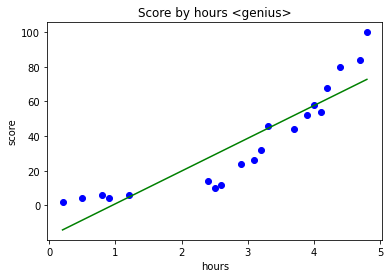

In [4]:
plt.scatter(X, y, color = 'blue')   # 산점도
plt.plot(X, reg.predict(X), color = 'green')   # 선그래프 / X 데이터에 대한 예측값을 y자리로
plt.title('Score by hours <genius>')   # 제목
plt.xlabel('hours')   # X축 이름
plt.ylabel('score')   # Y축 이름
plt.show()

In [5]:
reg.score(X, y)   # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [6]:
# 다항회귀는 sklearn에서 따로 클래스 제공해주지 않음, 독립변수(X, 시험점수, 피처)를 직접 다항식에 맞게 바꾼 다음에 선형회귀를 적용

from sklearn.preprocessing import PolynomialFeatures   # 몇차 다항식으로 적용할지 설정할수있다
poly_reg = PolynomialFeatures(degree = 4)   # 4차 다항식
X_poly = poly_reg.fit_transform(X)   # 피처 변환
                                    # fit은 새로 만들 피처들의 조합을 찾는 역할
                                    # transform은 실제로 데이터를 변환하는 작업
X_poly[:5]   # 피처가 확정됨(위에서 설정한 degree에 맞게 X^0, X^1, X^2, X^3, X^4 까지를 피처로 만들어줌)
            # [X] -> [X^0, X^1, X^2, X^3, X^4] => X가 3이라면 [1, 3, 9, 27, 81] 으로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [7]:
X[:5]    # 원본 데이터

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [8]:
poly_reg.get_feature_names_out()    

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [9]:
# 선형회귀로 적용

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)     # 변환된 X와 y를 가지고 모델 생성(학습)

LinearRegression()

### 데이터 시각화 (변환된 X와 y)

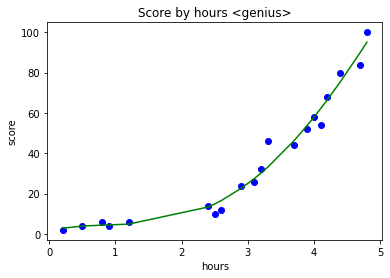

In [22]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'green')     # 확장된 피처(입력변수 3개로 늘어남)를 가지고 선을 그어줌
plt.title('Score by hours <genius>')   # 제목
plt.xlabel('hours')   # X축 이름
plt.ylabel('score')   # Y축 이름
plt.show()

In [11]:
# 선을 좀 더 부드럽게 하기 (선이 뚝뚝 끊기게 보이는 이유는 X데이터 갯수가 많이 없어서임)
X_range = np.arange(min(X), max(X), 0.1)    # X의 최솟값에서 최댓값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [12]:
X_range.shape   # 46개의 데이터가 일차원 배열로 존재

(46,)

In [13]:
X[:5]    # 이차원 형태로 존재

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [23]:
# X_range 그래도 쓰면 안됨(차원을 맞춰줘야해) => X_range의 형태변환
X_range = X_range.reshape(-1, 1)    # 입력파라미터 -> (row갯수(-1을 쓰면 자동계산), column갯수)
#X_range.reshape(len(X_range), 1) 도 가능 

X_range.shape

(46, 1)

In [15]:
X.shape

(20, 1)

In [16]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

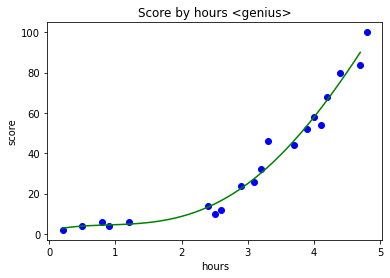

In [17]:
# 다시 데이터 시각화

plt.scatter(X, y, color = 'blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color = 'green')
plt.title('Score by hours <genius>')   # 제목
plt.xlabel('hours')   # X축 이름
plt.ylabel('score')   # Y축 이름
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [18]:
# 선형 회귀 모델 기반
reg.predict([[2]])   # 2시간 공부했을 때 선형 회귀 모델의 예측 값

array([19.85348988])

In [19]:
# 다항 회귀 모델 기반
lin_reg.predict(poly_reg.fit_transform([[2]]))   # 2시간 공부했을 때 다항 회귀 모델의 예측 값 

array([8.70559135])

In [20]:
lin_reg.score(X_poly, y)     # 다항 회귀를 통한 모델 평가

0.9782775579000045